# STOR 320: Introduction to Data Science
## Lab 11

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf

Diabetes dataset:

- age: This feature represents the normalized age of the patient. The values are scaled and centered around the mean, which means they don't represent actual ages but rather relative differences.

- sex: The normalized gender information of the patient. Like the age feature, this is a numerical value that has been scaled and centered.

- bmi: The Body Mass Index (BMI) of the patient, which is a measure of body fat based on weight and height. This feature is also normalized and centered.

- bp: The average blood pressure of the patient. It has been measured and normalized to represent a scaled version, not an absolute pressure in mmHg.

- s1: This is a measure related to serum cholesterol levels. The value is normalized and represents the blood serum measurement, not an actual cholesterol count.

- s2: A measure related to low-density lipoproteins (LDL), another cholesterol-related measure, which is scaled and centered.

- s3: This feature is related to high-density lipoproteins (HDL), known as "good" cholesterol. Again, it is a normalized measure.

- s4: This column represents the level of serum triglycerides, a type of fat (lipid) in the blood. The value is scaled and normalized.

- s5: A measure related to the level of serum insulin, normalized and centered to represent relative differences between patients.

- s6: A measure related to the blood sugar level (glucose). The feature is scaled and centered, like the other measurements.

- target: The response variable, representing the progression of diabetes one year after the baseline measurements. This is a continuous value indicating how much the disease has progressed.

In [14]:
# Load the dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [15]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


1. Present 10 scatter plots between target and each of the feature columns

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


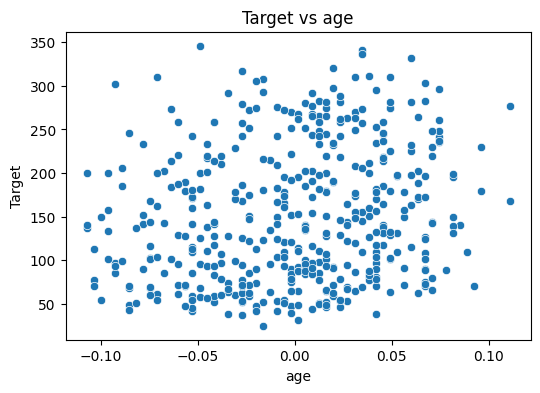

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


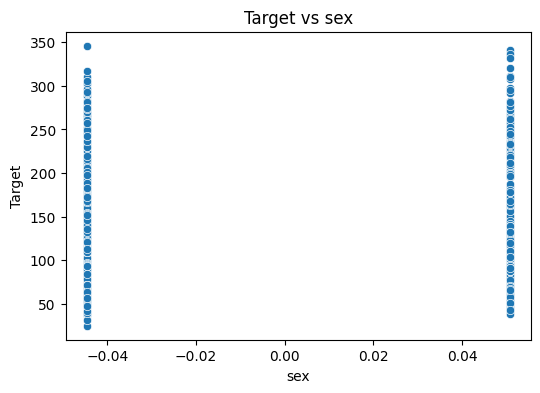

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


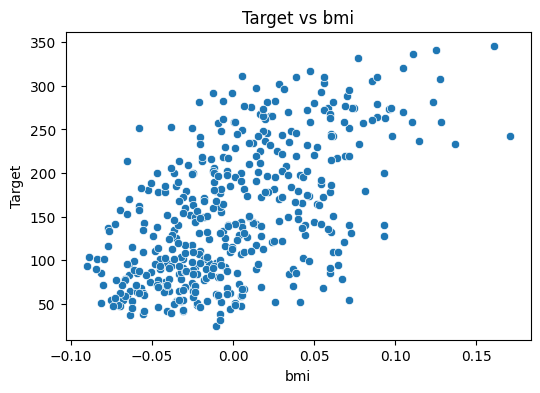

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


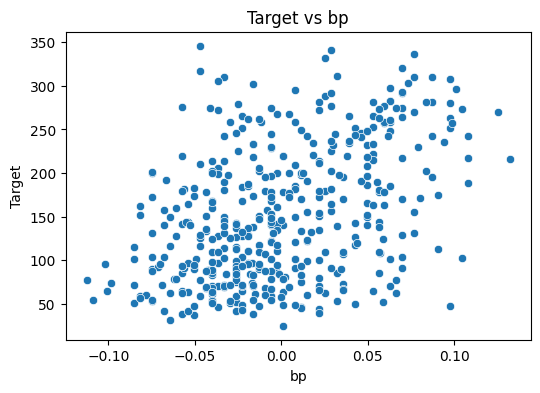

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


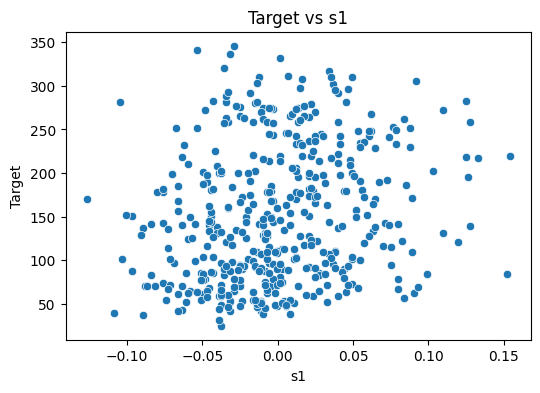

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


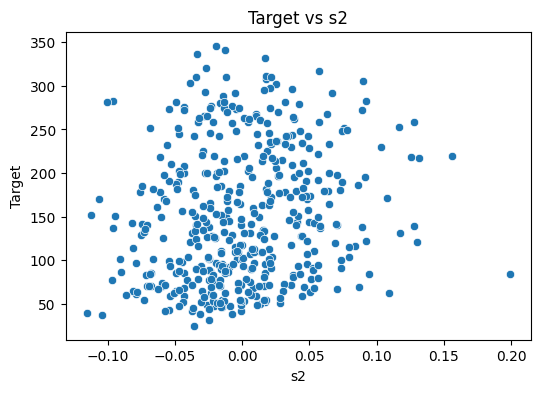

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


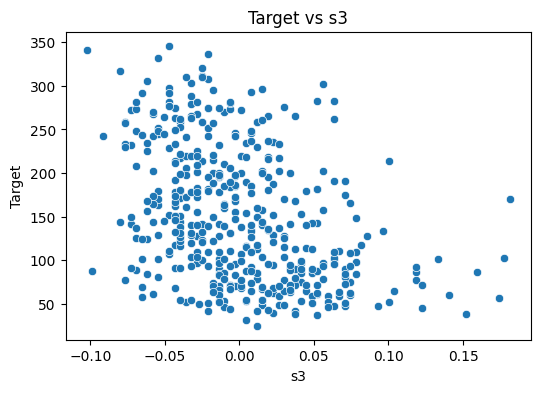

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


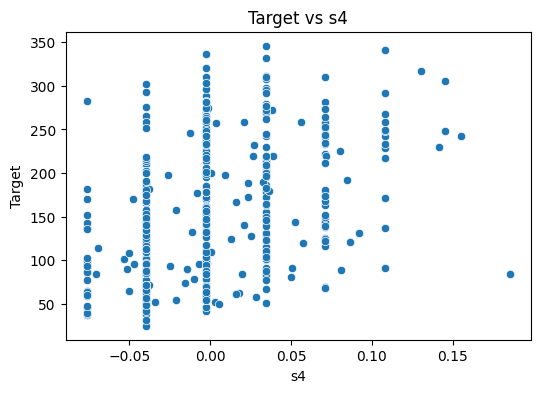

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


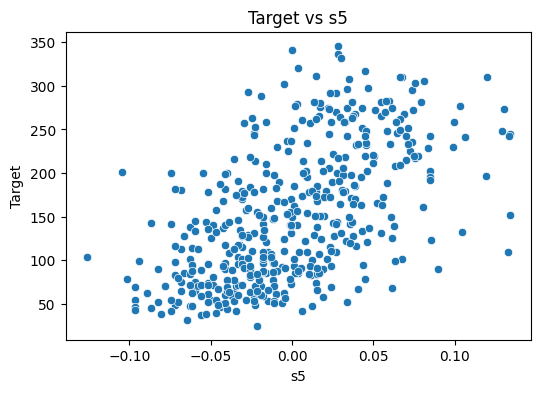

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


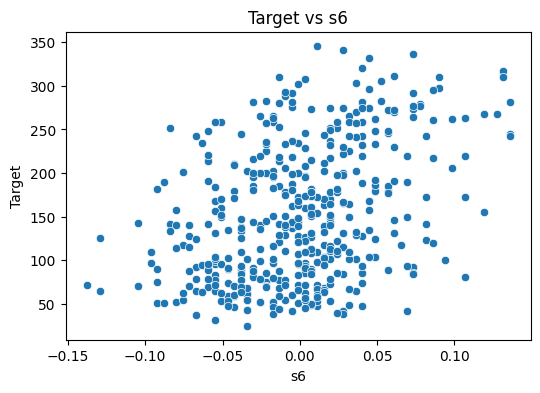

In [21]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='target')
    plt.title(f'Target vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()


2. Present the pair plot to check correlations. Do you find any correlation?

c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\conor\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

StopIteration: 

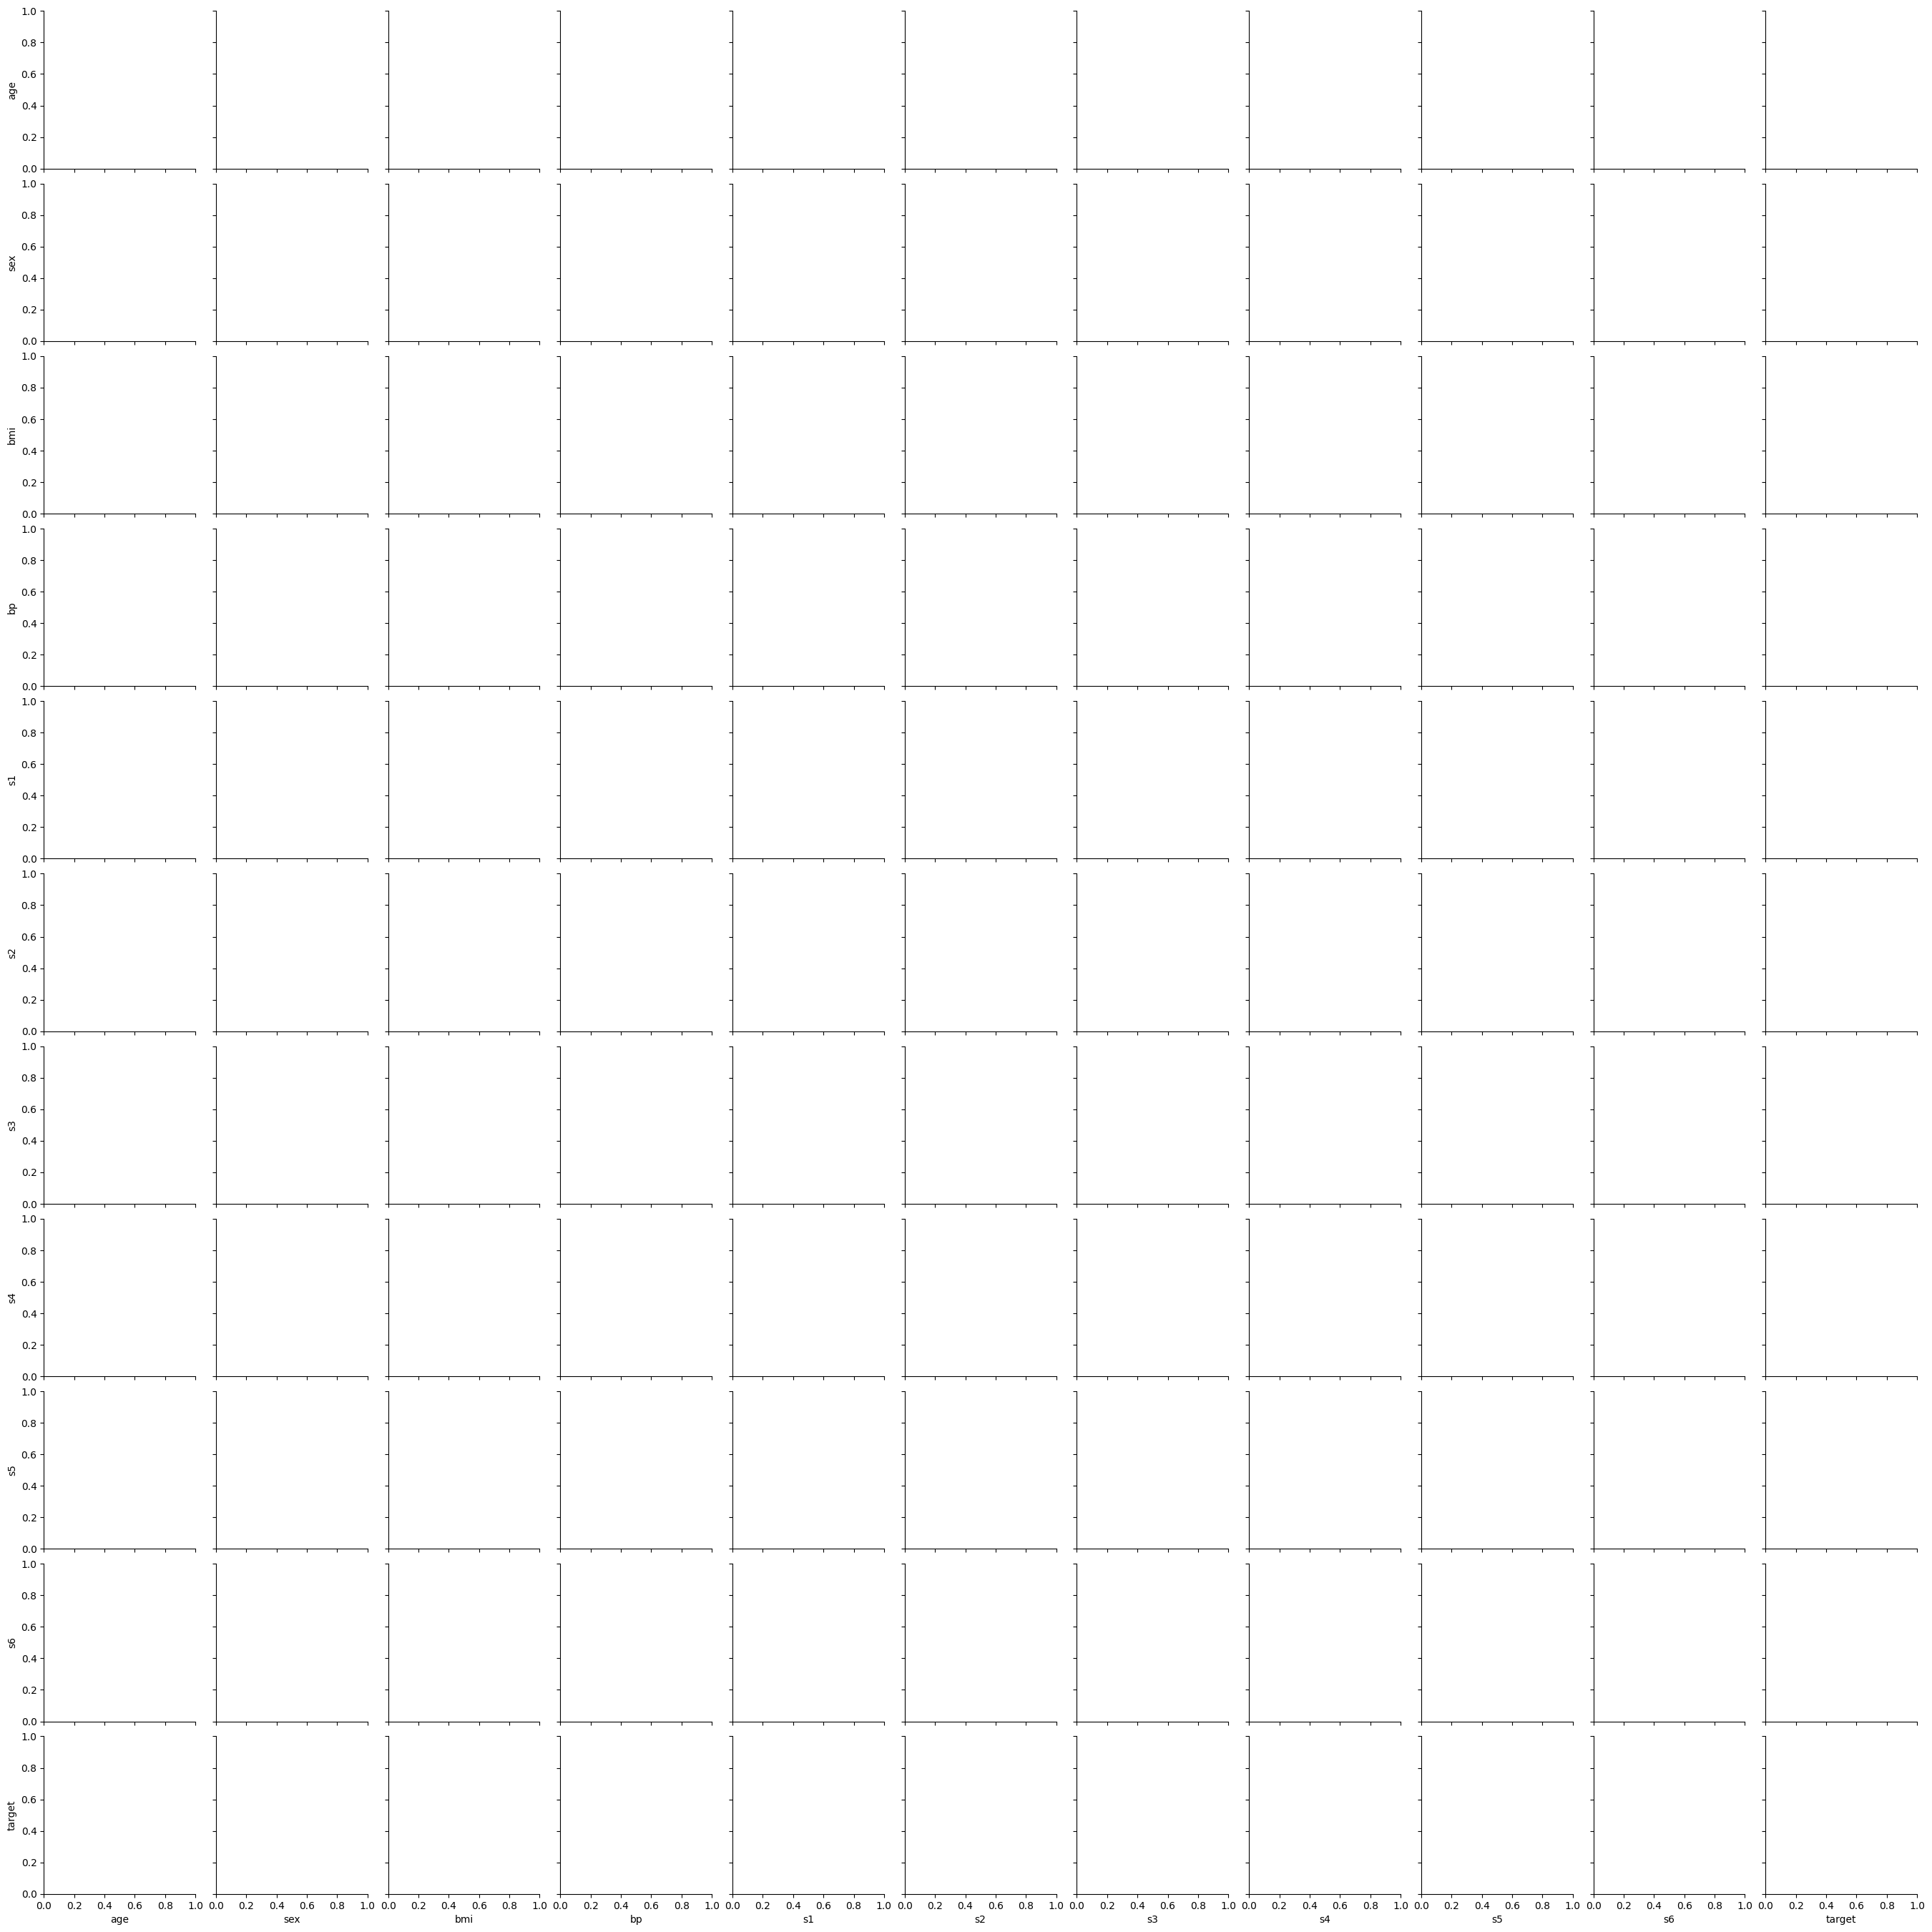

In [ ]:
df_clean = df.dropna()

numeric_df_clean = df_clean.select_dtypes(include=[np.number])
sns.pairplot(numeric_df_clean)
plt.show()


In [22]:
correlation_matrix = df_clean.corr()
correlation_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

3. Split the data (`X` and `y`) into a training set (80%) and a test set (20%) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. For both training and testing dataset, add second-order features and their interactions.

Hint: you can use `PolynomialFeatures`.

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"{X_train.shape}, {X_train_poly.shape}")
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X, y)

X, y

(353, 10), (353, 65)


(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

5. Build a linear regression model using all the features including the second order term and interaction term. Calculate the R2 and OSR2.

In [ ]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_train_pred = lr.predict(X_train_poly)
y_test_pred = lr.predict(X_test_poly)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 (Train): {r2_train:.3f}")
print(f"OSR2 (Test): {r2_test:.3f}")
print(X.shape)
all_columns = "+".join(X.columns.difference(["LogSalePrice"]))
my_formula = "LogSalePrice~" + all_columns +'-1'
print(my_formula)

mod_naive_poly = smf.ols(my_formula, data=ames_train_poly)
nlr_poly = mod_naive_poly.fit()

print(nlr_poly.summary())

NameError: name 'r2_score' is not defined

6. Build a PCR model. Set the number of PC as 6. Calculate R2 and OSR2. Is OSR2 better than the linear regression?

In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

lr_pcr = LinearRegression()
lr_pcr.fit(X_train_pca, y_train)

y_train_pcr_pred = lr_pcr.predict(X_train_pca)
y_test_pcr_pred = lr_pcr.predict(X_test_pca)

r2_train_pcr = r2_score(y_train, y_train_pcr_pred)
r2_test_pcr = r2_score(y_test, y_test_pcr_pred)

print(f"{r2_train_pcr:.3f}")
print(f"{r2_test_pcr:.3f}")


7. Build a Ridge model. Set the regularization parameter as 0.1. Calculate R2 and OSR2. Is OSR2 better than the linear regression?

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

y_train_ridge_pred = ridge.predict(X_train_poly)
y_test_ridge_pred = ridge.predict(X_test_poly)

r2_train_ridge = r2_score(y_train, y_train_ridge_pred)
r2_test_ridge = r2_score(y_test, y_test_ridge_pred)

print(f"{r2_train_ridge:.3f}")
print(f"{r2_test_ridge:.3f}")


8. Build a Lasso model. Set the regularization parameter as 0.1. Calculate R2 and OSR2. Is OSR2 better than the linear regression?

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)

y_train_lasso_pred = lasso.predict(X_train_poly)
y_test_lasso_pred = lasso.predict(X_test_poly)

r2_train_lasso = r2_score(y_train, y_train_lasso_pred)
r2_test_lasso = r2_score(y_test, y_test_lasso_pred)

print(f"{r2_train_lasso:.3f}")
print(f"{r2_test_lasso:.3f}")
